# Importing the dataset and the libraries

In [ ]:
import pandas as pd
import numpy as np
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Classification challenge

Your goal are :
- to merge both 2018 DataFrames
- to train-test split the new 2018 DataFrame
- to train 3 differents Machine Learning algorithms (KNN, logistic regression and decision tree) with "opinion" as target
- to try different parameters
- to find the best accuracy score (on the test set of course)
- to fill the missing values in the "opinion" columns whith your best model
- to explain what is the "rules" used by your model to predict the opinion.

You can help yourself with charts if you want.

# Merging both 2018 DataFrames

In [ ]:
print(df_main.shape)
print(df_opinion.shape)

(365, 15)
(341, 6)


In [ ]:
df = pd.merge(df_main,df_opinion, how = 'left', left_on = 'DATE', right_on = 'date')
df.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,2018-01-01,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,2018-01-02,122.0,0.0,3.0,3.3,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,2018-01-03,122.0,0.0,3.0,3.3,bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,2018-01-04,116.0,0.0,3.0,3.3,bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,2018-01-05,116.0,0.0,3.0,6.9,bad


In [ ]:
df = df.drop(columns = 'date')
print(df.shape)
df.head()

(365, 20)


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,bad


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

In [ ]:
df.isna().sum()

DATE                       0
MAX_TEMPERATURE_C          0
MIN_TEMPERATURE_C          0
WINDSPEED_MAX_KMH          0
TEMPERATURE_MORNING_C      0
TEMPERATURE_NOON_C         0
TEMPERATURE_EVENING_C      0
PRECIP_TOTAL_DAY_MM        0
HUMIDITY_MAX_PERCENT       0
VISIBILITY_AVG_KM          0
PRESSURE_MAX_MB            0
CLOUDCOVER_AVG_PERCENT     0
HEATINDEX_MAX_C            0
DEWPOINT_MAX_C             0
WINDTEMP_MAX_C             0
WEATHER_CODE_EVENING      24
TOTAL_SNOW_MM             24
UV_INDEX                  24
SUNHOUR                   24
OPINION                   24
dtype: int64

#  Train-test split of the new 2018 DataFrame (with "opinion" as target)

In [ ]:
#our target must be OPINION. However, OPINION is an object. We have to transform OPINION into INT values.

df['OPINION'].unique()

array(['bad', 'very bad', nan, 'not good not bad', 'good', 'very good'],
      dtype=object)

In [ ]:
df['OPINION'].value_counts()

good                91
very bad            82
bad                 79
not good not bad    68
very good           21
Name: OPINION, dtype: int64

In [ ]:
df['OPINION'].isna().sum()

24

In [ ]:
#we replace opinions by integers 
df['OPINION'] = df['OPINION'].apply(lambda x: 0 if x == 'very bad' else (1 if x == 'bad' else (2 if x == 'not good not bad' else (3 if x == 'good' else (4 if x == 'very good' else np.nan)))))

#we check if it worked
print(df['OPINION'].value_counts())
print(df['OPINION'].isna().sum())

3.0    91
0.0    82
1.0    79
2.0    68
4.0    21
Name: OPINION, dtype: int64
24


In [ ]:
#we stock the match between opinions and integer in a dataframe
list_opinions = ['bad', 'very bad', np.nan , 'not good not bad', 'good', 'very good']

opinions = pd.DataFrame(data = df['OPINION'].unique(), index = list_opinions, columns = ['opinion_int'])
opinions.sort_values(by = 'opinion_int')

,opinion_int
very bad,0.0
bad,1.0
not good not bad,2.0
good,3.0
very good,4.0
NaN,NaN


In [ ]:
#before splitting the dataset, we look at the correlations with OPINION

df.corr()['OPINION'].sort_values(ascending=False)

OPINION                   1.000000
MAX_TEMPERATURE_C         0.880554
TEMPERATURE_NOON_C        0.878449
HEATINDEX_MAX_C           0.875463
TEMPERATURE_EVENING_C     0.843455
WINDTEMP_MAX_C            0.839561
DEWPOINT_MAX_C            0.764366
MIN_TEMPERATURE_C         0.762138
TEMPERATURE_MORNING_C     0.733315
SUNHOUR                   0.642791
PRESSURE_MAX_MB           0.188994
VISIBILITY_AVG_KM         0.147736
UV_INDEX                  0.113744
WEATHER_CODE_EVENING     -0.065573
PRECIP_TOTAL_DAY_MM      -0.198563
WINDSPEED_MAX_KMH        -0.293089
HUMIDITY_MAX_PERCENT     -0.476245
CLOUDCOVER_AVG_PERCENT   -0.532455
TOTAL_SNOW_MM                  NaN
Name: OPINION, dtype: float64

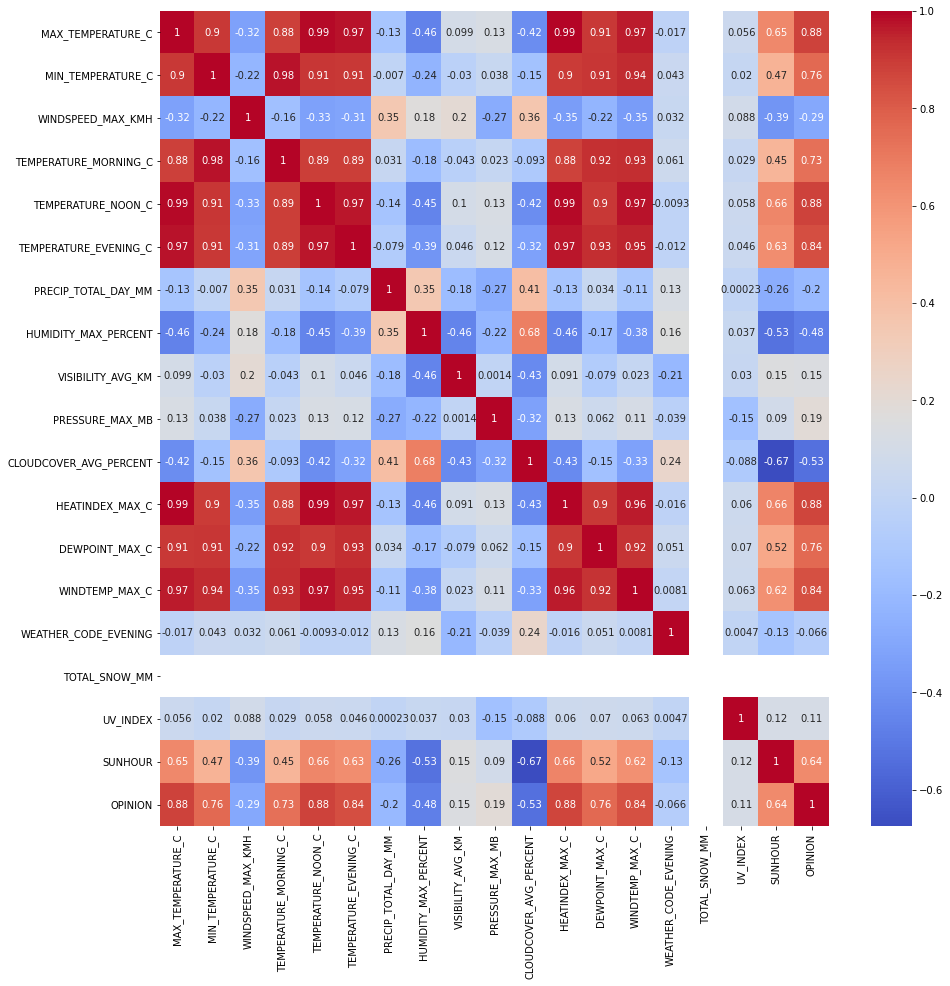

In [ ]:
#heatmap

fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)


## Dividing dataset between df_clean (without NaNs) and df_nan (with NaNs)

In [ ]:
df_clean = df[df['OPINION'].isna() == False]
df_clean.shape

(341, 20)

In [ ]:
df_nan = df[df['OPINION'].isna() == True]
df_nan.shape

(24, 20)

In [ ]:
#we create a 'FLAG' column to visualize the real values and predicted values at the end of the prediction

df_clean['FLAG'] = np.where(df_clean['OPINION'].isna() == False, 'real values', 'predicted values')
df_clean.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,FLAG
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.5,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,1.0,real values
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.0,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,1.0,real values
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.5,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,1.0,real values


In [ ]:
#we do it for both df_clean and df_nan
df_nan['FLAG'] = np.where(df_nan['TOTAL_SNOW_MM'].isna() == False, 'real values', 'predicted values')
df_nan.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,FLAG
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.000,10,6,5,NaN,NaN,NaN,NaN,NaN,predicted values
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.500,8,3,2,NaN,NaN,NaN,NaN,NaN,predicted values
66,2018-03-08,13,7,23,7,12,9,0.4,87,9.750,1005,52.625,13,7,6,NaN,NaN,NaN,NaN,NaN,predicted values


# Spliting the df_clean

In [ ]:
#we choose the variables according to the correlations and split the dataset. We pay attention not to choose a variable which contains NaN in df_nan
#we choose a random_state of 42 and a train_size of 0.80

X = df_clean[['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C','TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 
       'HEATINDEX_MAX_C','DEWPOINT_MAX_C', 'WINDTEMP_MAX_C']]

y = df_clean['OPINION']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.80)

# Training 3 differents Machine Learning algorithms

## Feature scaling

In [ ]:
#we normalize the data of the train and test sets
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [ ]:
#we fit a logistic regression with the train set
model_reg = LogisticRegression()
model_reg.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#accuracy scores
print("accuracy score on train set:",model_reg.score(X_train, y_train))
print("accuracy score on test set:",model_reg.score(X_test, y_test))

#the accuracy score is ok and there a little overfitting

accuracy score on train set: 0.7941176470588235
accuracy score on test set: 0.7391304347826086


In [ ]:
#list of classes

model_reg.classes_

array([0., 1., 2., 3., 4.])

In [ ]:
#iterations needed

model_reg.n_iter_

array([65], dtype=int32)

In [ ]:
#matrix of prediction probabilities

matrix_proba = pd.DataFrame(data = model_reg.predict_proba(X_test), columns = model_reg.classes_)
matrix_proba.head()

,0.0,1.0,2.0,3.0,4.0
0,0.970431,0.019725,0.009475,0.000369,1.606477e-08
1,0.049706,0.912149,0.036504,0.001640,2.308124e-06
2,0.019694,0.300543,0.604780,0.074926,5.700517e-05
3,0.987402,0.011866,0.000565,0.000167,3.528126e-08
4,0.014891,0.919972,0.063319,0.001814,3.106317e-06


In [ ]:
#we look at the confusion matrix
#the index are the actual values of y_test and the columns are the predicted values

pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model_reg.predict(X_test)),
             index = model_reg.classes_,
             columns = model_reg.classes_)

,0.0,1.0,2.0,3.0,4.0
0.0,20,0,0,0,0
1.0,2,8,1,0,0
2.0,0,8,6,3,0
3.0,0,0,0,14,3
4.0,0,0,0,1,3


In [ ]:
#we print the classification report
print(classification_report(y_test, model_reg.predict(X_test)))

'''
precision : the classes have a high percentage of predicted values that were correctly classified. 
recall : the classes 0, 1, 3 and 4 have a high precentage of actual values that were correctly classified. 2 has a percentage which is low.
f1-score : the weighted average of F1 is 0.74 which is quite good.

'''

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        20
         1.0       0.50      0.73      0.59        11
         2.0       0.86      0.35      0.50        17
         3.0       0.78      0.82      0.80        17
         4.0       0.50      0.75      0.60         4

    accuracy                           0.74        69
   macro avg       0.71      0.73      0.69        69
weighted avg       0.78      0.74      0.73        69



'\nprecision : the classes have a high percentage of predicted values that were correctly classified. \nrecall : the classes 0, 1, 3 and 4 have a high precentage of actual values that were correctly classified. 2 has a percentage which is low.\nf1-score : the weighted average of F1 is 0.74 which is quite good.\n\n'

## KNN

### Mean error value depending on K value

In [ ]:
#we want to know the best value of k

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

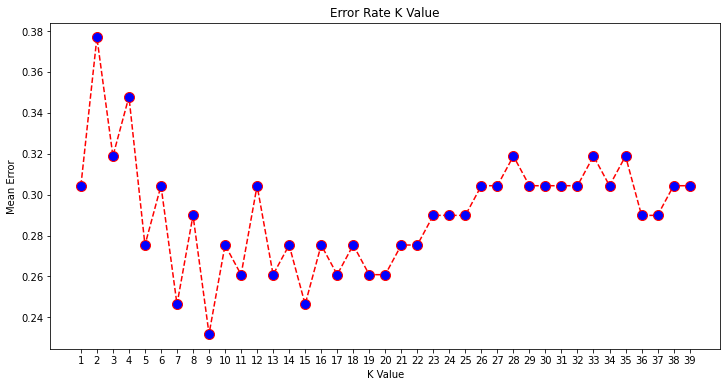

In [ ]:
#we plot the error values against K values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.xticks(ticks = range(1, 40))

plt.show()

#we can see that the mean error is closest to zero with k=9
#we will choose one of this value for our model

### Weights choice

In [ ]:
#we want to define which weight is better

#for weights = 'distance'


#we try the model with the best k values
k_list = [7,9]

max_accuracy = 0
max_i = 0
max_weights = ''

print("for weights = 'distance' : ")

for i in k_list:
  weights_1 = 'distance'
  knn = KNeighborsClassifier(n_neighbors = i, weights = weights_1)
  knn.fit(X_train, y_train)
  predictions = knn.predict(X_test)
  accuracy = accuracy_score(y_test,predictions)
  print("The accuracy score for a n_neighbors of {} is {}".format(i,round(accuracy,3)))
  if accuracy > max_accuracy:
    max_accuracy = accuracy
    max_i = i
    max_weights = weights_1


#for weights = 'uniform'

print("for weights = 'uniform' : ")

for i in k_list:
  weights_2 = 'uniform'
  knn = KNeighborsClassifier(n_neighbors = i, weights = weights_2)
  knn.fit(X_train, y_train)
  predictions = knn.predict(X_test)
  accuracy = accuracy_score(y_test,predictions)
  print("The accuracy score for a n_neighbors of {} is {}".format(i,round(accuracy,3)))
  if accuracy > max_accuracy:
    max_accuracy = accuracy
    max_i = i
    max_weights = weights_2

print('The best accuracy {} is with a n_neighbors of {} and a weights {}'.format(round(max_accuracy,3), max_i, max_weights))

for weights = 'distance' : 
The accuracy score for a n_neighbors of 7 is 0.754
The accuracy score for a n_neighbors of 9 is 0.783
for weights = 'uniform' : 
The accuracy score for a n_neighbors of 7 is 0.754
The accuracy score for a n_neighbors of 9 is 0.768
The best accuracy 0.783 is with a n_neighbors of 9 and a weights distance


### KNN Model

In [ ]:
#Now that we evaluated the best k value and the best weight, we can train and fit our model
model_knn = KNeighborsClassifier(n_neighbors = 9, weights = 'distance')
model_knn.fit(X_train, y_train)


#we predict
predictions = model_knn.predict(X_test)

#we look at the accuracy score
accuracy_knn = accuracy_score(y_test,predictions)
print("accuracy score of knn = %.3f" % accuracy_knn)

#At the moment accuracy scores for logistic regression and knn are almost the same but the accuracy score on the test set
#is a bit higher for the knn model

accuracy score of knn = 0.783


## Decision Tree

### Maximum depth

In [ ]:
#we want to evaluate which max_depth would be better for ou model
list_of_accuracies = []

max_accuracy2 = 0
max_depth_max = 0

for i in range(1, 11):
  modelDTC = DecisionTreeClassifier(max_depth = i)
  modelDTC.fit(X_train, y_train) #we fit the model
  modelDTC.predict(X_test)
  accuracy = modelDTC.score(X_test, y_test) #we stock the accuracy score of the model in a variable
  list_of_accuracies.append(accuracy) #e append this score in the list

  if accuracy > max_accuracy2: #we stock the max accuracy score and the max_depth which is matching
    max_accuracy2 = accuracy
    max_depth_max = i

#we print the list of accuracies according to the max_depth values
for i in range(len(list_of_accuracies)):
  print('The accuracy score for a max_depth of {} is {}'.format(i+1,list_of_accuracies[i]))

#we print the max_depth with the best accuracy score 
print('The best accuracy score {} is with a max_depth of {}'.format(round(max_accuracy2,3), max_depth_max))

The accuracy score for a max_depth of 1 is 0.5362318840579711
The accuracy score for a max_depth of 2 is 0.6811594202898551
The accuracy score for a max_depth of 3 is 0.7536231884057971
The accuracy score for a max_depth of 4 is 0.7536231884057971
The accuracy score for a max_depth of 5 is 0.7246376811594203
The accuracy score for a max_depth of 6 is 0.7391304347826086
The accuracy score for a max_depth of 7 is 0.7246376811594203
The accuracy score for a max_depth of 8 is 0.7246376811594203
The accuracy score for a max_depth of 9 is 0.7246376811594203
The accuracy score for a max_depth of 10 is 0.7681159420289855
The best accuracy score 0.768 is with a max_depth of 10


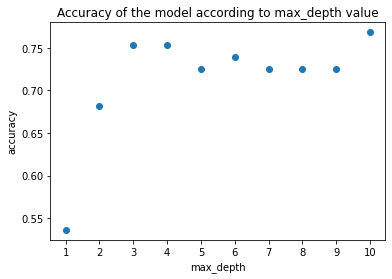

In [ ]:
#we plot the accuracy scores against the max_depth

#we use a scatterplot
max_depth = np.arange(1,11)
plt.scatter(x = max_depth, y = list_of_accuracies)

#title, ticks and legend
plt.xlabel('max_depth')
plt.xticks(ticks = max_depth)
plt.ylabel('accuracy')
plt.title('Accuracy of the model according to max_depth value')


plt.show()

#we see that the best accuracy score is obtained with a max_depth of 10

### Decision Tree model

In [ ]:
#Now that we evaluated the best max_depth, we can train and fit our model

modelDTC = DecisionTreeClassifier(max_depth = 10)
modelDTC.fit(X_train, y_train)

#prediction on test set
modelDTC.predict(X_test)

#we look at the accuracy score
print("accuracy score on train set:",modelDTC.score(X_train, y_train))
print("accuracy score on test set:",modelDTC.score(X_test, y_test))

accuracy score on train set: 0.9889705882352942
accuracy score on test set: 0.7391304347826086


In [ ]:
# we print each feature with importance %

pd.DataFrame(data = modelDTC.feature_importances_,
             index = X.columns,
             columns = ['importance(%)'])

,importance(%)
MAX_TEMPERATURE_C,0.046138
MIN_TEMPERATURE_C,0.303810
TEMPERATURE_MORNING_C,0.139785
TEMPERATURE_NOON_C,0.115870
TEMPERATURE_EVENING_C,0.035762
HEATINDEX_MAX_C,0.238403
DEWPOINT_MAX_C,0.071517
WINDTEMP_MAX_C,0.048715


In [ ]:
#the classes are the different opinions that we turned into integers
modelDTC.classes_

array([0., 1., 2., 3., 4.])

In [ ]:
opinions.sort_values(by = 'opinion_int')

,opinion_int
very bad,0.0
bad,1.0
not good not bad,2.0
good,3.0
very good,4.0
NaN,NaN


In [ ]:
list_classes = list(opinions.sort_values(by = 'opinion_int').index)
del list_classes[5]
list_classes

['very bad', 'bad', 'not good not bad', 'good', 'very good']

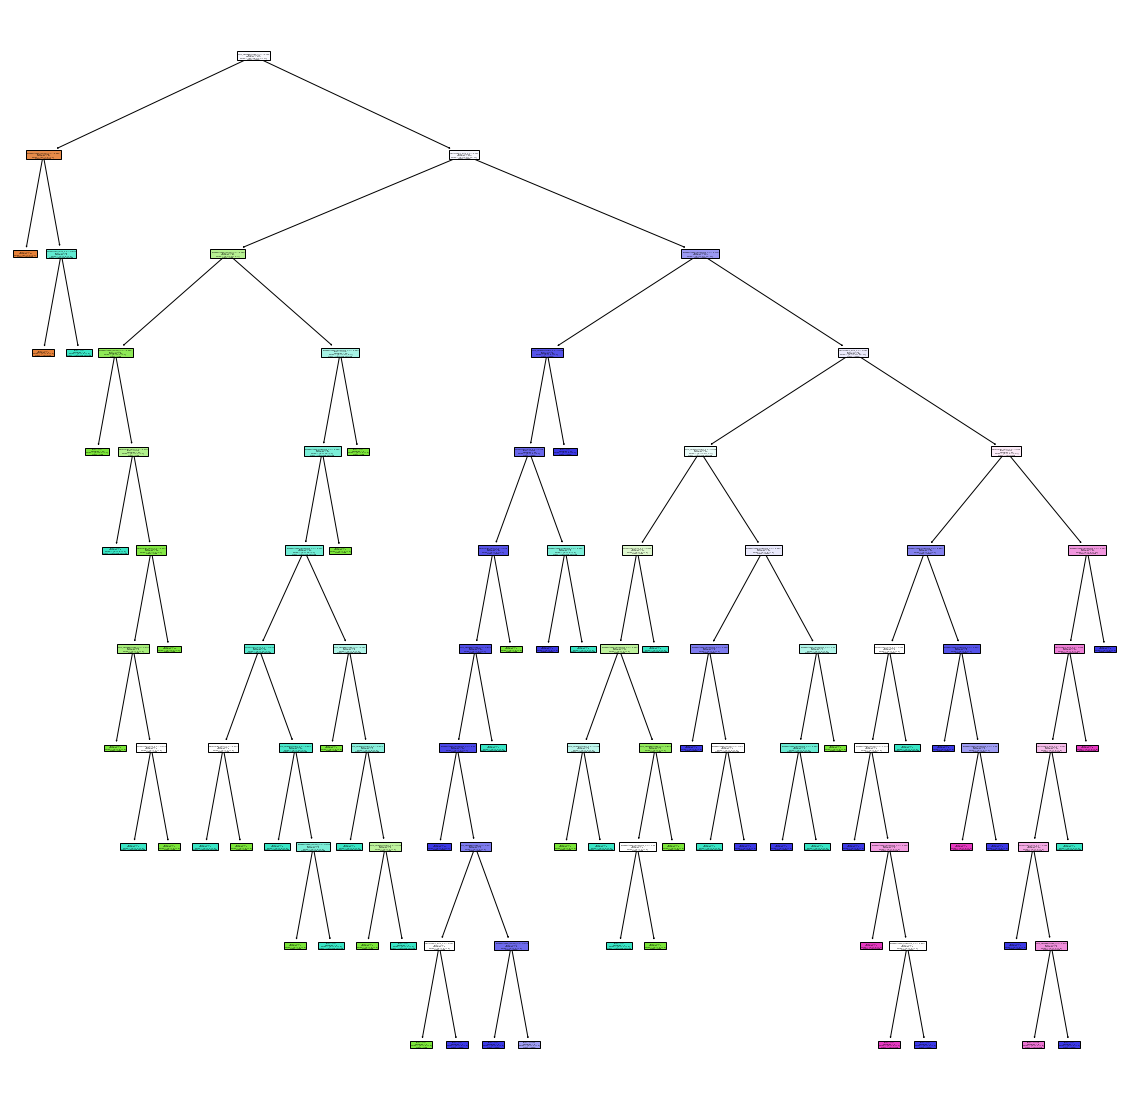

In [ ]:
# We plot the results

plt.figure(figsize = (20,20))
plot_tree(modelDTC, filled = True,  
          class_names = list_classes, 
          feature_names=X.columns )
plt.show()

# Filling the missing values in the "opinion" columns whith our best model (KNN)

In [ ]:
#Our best model is the KNN model. It has the best accuracy score. We must use a n_neighbors of 9 and a weights 'distance'.
#We fill our missing values in df_nan for the 'OPINION' column.

model_knn = KNeighborsClassifier(n_neighbors = 9, weights = 'distance')
model_knn.fit(X_train, y_train)


#we define our X
X_nan = df_nan[['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C','TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 
       'HEATINDEX_MAX_C','DEWPOINT_MAX_C', 'WINDTEMP_MAX_C']]

#we fill the Nan in OPINION column
df_nan['OPINION'] = model_knn.predict(X_nan)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
df_nan.head(2)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,FLAG
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.0,10,6,5,NaN,NaN,NaN,NaN,4.0,predicted values
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.5,8,3,2,NaN,NaN,NaN,NaN,4.0,predicted values


In [ ]:
#we concatenate df_clean and df_nan

df_complete = pd.concat([df_clean,df_nan], axis = 0)

df_complete.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,FLAG
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,1.0,real values
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,1.0,real values
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,1.0,real values
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,1.0,real values
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,1.0,real values


In [ ]:
#we check the shape
df_complete.shape

(365, 21)

In [ ]:
#we check the counts for OPINION columns
print(df_complete['OPINION'].value_counts())

3.0    91
0.0    82
1.0    79
2.0    68
4.0    45
Name: OPINION, dtype: int64


In [ ]:
#we replace the integers by strings in OPINION
df_complete['OPINION'] = df_complete['OPINION'].apply(lambda x: 'very bad' if x == 0 else ('bad' if x == 1 else ('not good not bad' if x == 2 else ('good' if x == 3 else 'very good' ))))

#we check if it worked
print(df_complete['OPINION'].value_counts())
print(df_complete['OPINION'].isna().sum())

good                91
very bad            82
bad                 79
not good not bad    68
very good           45
Name: OPINION, dtype: int64
0


In [ ]:
df_complete.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,FLAG
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad,real values
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad,real values
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,bad,real values
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,bad,real values
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,bad,real values


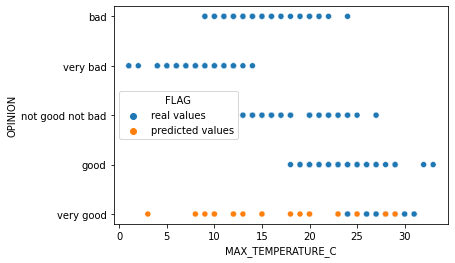

In [ ]:
#we turn Date column into datetime
df_complete['DATE'] = pd.to_datetime(df_complete['DATE'])

#we plot the MAX_TEMPERATURE_C with a hue FLAG to see the opinion that have been predicted
sns.scatterplot(x = 'MAX_TEMPERATURE_C', y= 'OPINION', hue = 'FLAG', data = df_complete )